In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('train.csv')

In [20]:
na_revenue = data.loc[data['belongs_to_collection'].isna(), 'revenue']
col_revenue = data.loc[data['belongs_to_collection'].notnull(),'revenue']
revs = [np.log(na_revenue), np.log(col_revenue)]

In [7]:
print('Number of movies not in collection:',len(na_revenue))
print('Number of movies in collection:', len(col_revenue))

Number of movies not in collection: 2396
Number of movies in collection: 604


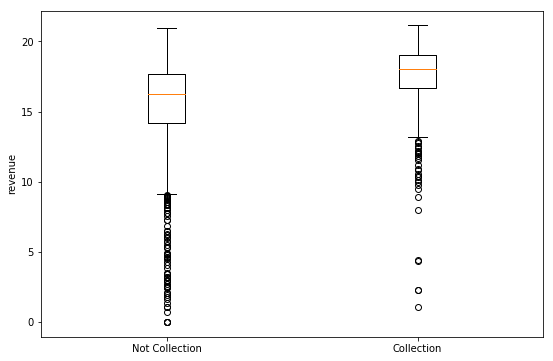

In [22]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(revs)
ax.set_xticklabels(['Not Collection', 'Collection'])
ax.set_ylabel('revenue')
fig.savefig('logdiffcollection.png', bbox_inches='tight')

In [24]:
q75n, q50n, q25n = np.percentile(revs[0], [75,50,25])
q75c, q50c, q25c = np.percentile(revs[1],[75,50,25])

print('Interquartile range for solo\n25%: {}\t50%: {}\t75%: {}'.format(q25n, q50n, q75n))
print('Interquartile range for collection\n25%: {}\t50%: {}\t75%: {}'.format(q25c, q50c, q75c))
print('Difference\n25%: {}\t50%: {}\t75%: {}'.format(q25n-q25c, q50n-q50c, q75n-q75c))

#Correlation that belonging in a collection means higher revenue

Interquartile range for solo
25%: 14.22097566607244	50%: 16.249789111229923	75%: 17.687490280735595
Interquartile range for collection
25%: 16.66300140247109	50%: 18.026413714943857	75%: 19.059241616279774
Difference
25%: -2.4420257363986497	50%: -1.776624603713934	75%: -1.3717513355441788


In [10]:
use_data = pd.DataFrame()
use_data['iscollect'] = data['belongs_to_collection'].notnull().astype('int')
use_data['revenue'] = np.log(data['revenue'])

In [11]:
import json

In [13]:
genres = data['genres']

In [14]:
unique_genres = set()
for gen in genres:
    try:
        names = json.loads(gen.replace("'",'"'))
        name_list = [name['name'] for name in names]
        unique_genres.update(name_list)
    except:
        pass

In [15]:
list(unique_genres)

['Crime',
 'Thriller',
 'Animation',
 'Action',
 'Romance',
 'Family',
 'Drama',
 'Documentary',
 'War',
 'Science Fiction',
 'Mystery',
 'Western',
 'Fantasy',
 'Music',
 'Comedy',
 'History',
 'Adventure',
 'TV Movie',
 'Foreign',
 'Horror']

In [16]:
use_data = use_data.reindex(list(unique_genres)+['iscollect'],fill_value=0,axis='columns')

In [17]:
for i, gen in enumerate(genres):
    try:
        names = json.loads(gen.replace("'",'"'))
        name_list = [name['name'] for name in names]
        for n in name_list:
            use_data.at[i,n] = 1
    except:
        pass

In [18]:
rev = data['revenue']

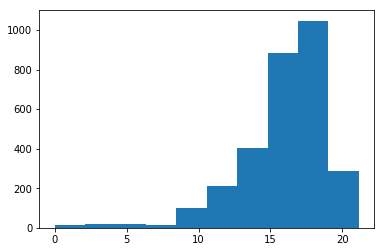

In [27]:
#Looks like the data has an exponential distribution
plt.hist(np.log(rev), bins=10)
plt.savefig('logrevhist.png')

In [28]:
use_data

,Crime,Thriller,Animation,Action,Romance,Family,Drama,Documentary,War,Science Fiction,...,Western,Fantasy,Music,Comedy,History,Adventure,TV Movie,Foreign,Horror,iscollect
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
